# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

# get some sense of the data
print
print "mean"
print data.mean()
print 
print "std"
print data.std()


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

mean
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

std
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

PCAs are basis of a new vector space.  The goal is to order the basis of this space from maximum variation to least variation. The hope being if we reduce the dimensions, buy keep those with the most variation we will keep the most information present. Since they are a basis for a space then with be orthogonal to each other, the dot product of each pair of basis should be 0.  A sample vector likely has a non zero value in each of the goods, since the basis isn't necessarily representative of the buying patterns of any particular type of store.

ICAs might be thought as representing different buying pattern of the relative goods at different types of stores. Stores don't necessarily only buy one type of product, but convience stores (7/11, gas station stores) buy a certain relative pattern of the six categories, where as drug stores (Walgreens/CVS) buy a different pattern.  The elements of the components are the ratio that these categories are bought relative to one another.  so a vector of [0.1 0.9 0.9 0.0 0.0 0.0] would represent a store that bought predomiently milk and groceries in the same quantities, and some milk, but less by a factor of 9.  It would not be uncommon so see near zero values if a store type hardly sold any of that class of goods, say frozen food at a fresh food stand.


###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print '-- verify inverse transform of scaling with first vector'
print scaler.fit_transform(data).shape
print scaler.inverse_transform([[ 5.29331898e-02, 5.23567773e-01, -4.11148934e-02, -5.89367156e-01, -4.35687319e-02, -6.63390575e-02]])
print '--'
print '-- verify scaled data looks scaled'
print 'min, expect <0', scaled_data.min(axis=0)
print 'max, expect >0', scaled_data.max(axis=0)
print (scaled_data.max(axis=0)-scaled_data.min(axis=0))
print 'mean, expect near 0', scaled_data.mean(axis=0)
print 'std, expect near 1', scaled_data.std(axis=0)
print '--'


from sklearn.decomposition import PCA
n_columns = data.shape[1]
print 'number of columns (will use for number of components)', n_columns
pca = PCA(n_components=n_columns)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print "components_"
print pca.components_
print "explained_variance_ratio_"
print pca.explained_variance_ratio_


n_columns = scaled_data.shape[1]
print n_columns
scaled_pca = PCA(n_components=n_columns)
scaled_pca.fit(scaled_data)

# Print the components and the amount of variance in the data contained in each dimension
print "components_"
print scaled_pca.components_
print "explained_variance_ratio_"
print scaled_pca.explained_variance_ratio_

-- verify inverse transform of scaling with first vector
(440, 6)
[[ 12668.99999988   9655.99999839   7561.00000035    213.99999891
    2674.00000002   1338.00000005]]
--
-- verify scaled data looks scaled
min, expect <0 [-0.94968309 -0.77879505 -0.83733437 -0.62834303 -0.60441648 -0.54026439]
max, expect >0 [  7.92773757   9.18364979   8.93652831  11.91900152   7.96767199
  16.47844745]
[  8.87742066   9.96244484   9.77386267  12.54734455   8.57208847
  17.01871184]
mean, expect near 0 [ -3.43159844e-17   0.00000000e+00  -4.03717464e-17   3.63345717e-17
   2.42230478e-17  -8.07434927e-18]
std, expect near 1 [ 1.  1.  1.  1.  1.  1.]
--
number of columns (will use for number of components) 6
components_
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
Normally one would like to scale the data so one can compare dimensions of different units.  This data set is all in dollar amounts, so that purpose of scaling is removed.  However without scaling, it is possible that the relatively costliness of one dimension will hide some important distiction between groups of buyers.  So I've chosen to look at both scaled and raw data.

For the raw data, the first two component factors, 0.4596 and 0.4052 are similar, but then the third factor drops by a factor of between 5 and 6 to 0.0700. The fourth factor is down by and order of magnitude to 0.044.  I would include the first two dimensions, perhaps the third but no more.

For the scaled data, an order of magnitude data drop isn't seen until the 5th component,  I would include the first 4 with the scaled data.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer:
Raw --
The first principle component ( [-0.98 -0.12 -0.06 -0.15  0.01 -0.07] )is made up most strongly of the 'Fresh' dimension.  This isn't too surprising, 'Fresh' has the greatest min to max range, and the largest standard deviation, so one would expect without scaling, this feature to dominate the variance.
The second principle component ( [-0.11  0.52  0.76 -0.02  0.37  0.06] ) is made up most stongly of 'Grocery','Milk', and 'Detergent_Paper' in that order

Scaled --
The first principle component ( [-0.04 -0.55 -0.58 -0.05 -0.55 -0.25] ) is 'Milk','Grocery','Detergents_Paper', which was the makeup of the second component in the Raw case.
The second principle component ( [-0.53 -0.08  0.15 -0.61  0.26 -0.50] ) is 'Frozen','Fresh','Delicatessen'

###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

ica = FastICA(n_components=6)
S_data = ica.fit_transform(scaled_data)


# Print the independent components
print ica.components_ 

# Scale and print as integer
print np.ndarray.round(ica.components_ *100)


[[ 0.01092988  0.00103564 -0.00734779 -0.05404952  0.00264264  0.01676682]
 [ 0.00488201  0.00161843  0.00570125  0.00253165 -0.00242907 -0.05096479]
 [-0.00378408  0.01701678  0.11445245 -0.00709403 -0.13432903 -0.01614542]
 [-0.00265834  0.01389964 -0.06103177 -0.00199201  0.00387811  0.00410008]
 [-0.05022782  0.00633505  0.00594083  0.00328437 -0.00983198  0.00293676]
 [ 0.00194143  0.07257807 -0.05515602 -0.00176383  0.01579923 -0.01706237]]
[[  1.   0.  -1.  -5.   0.   2.]
 [  0.   0.   1.   0.  -0.  -5.]
 [ -0.   2.  11.  -1. -13.  -2.]
 [ -0.   1.  -6.  -0.   0.   0.]
 [ -5.   1.   1.   0.  -1.   0.]
 [  0.   7.  -6.  -0.   2.  -2.]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:

Vectors have be rescaled to more a more human scale for ease of understanding and presentation.
[  1.   0.  -1.  -5.   0.   2.]  represents [ 0.01092988  0.00103564 -0.00734779 -0.05404952  0.00264264  0.01676682]
etc.

Each vector might represent a type of store.  Stores of the same general type (example types might be fresh food stand, Drug Store, Grocery Store, Convience Store, Mega Store) would have similar buying patterns of categories relative to one another.  Each of the individual components could represent a store type, or perhaps a department within a larger store.


 ([  1.   0.  -1.  -5.   0.   2.] FROZEN Deli Grocery fresh)
 This is a convience store mainly selling frozen item and to a lesser extent deli products
 
 ([  0.   0.   1.   0.  -0.  -5.] DELI grocery)
 This is a deli selling mainly deli products and a small array of condiments and snack

 ([ -0.   2.  11.  -1. -13.  -2.] D&P GROCERY milk deli frozen)
 This is a Walgreens/CVS drug store selling household product (detergent and paper), packaged commidity goods, a
 little bit of everything, but no fresh produce.
 
 ([ -5.   1.   1.   0.  -1.   0.] FRESH milk grocery d&p)
 This is a fresh produce shop selling a few sundry milk groceries and paper product
 
 ([ -0.   1.  -6.  -0.   0.   0.] GROCERY milk)
 This is a smaller corner grocery store selling mainly packaged groceries and a bit of milk.

 ([  0.   7.  -6.  -0.   2.  -2.] MILK GROCERY d&p deli)
 This is a larger grocery store, selling mainly milk and grocer, but also some household product and deli food.
 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means clustering --
  computationally faster,
  tighter clusters
  
Gaussian Mixture Models -- 
  soft classification is available
  
For our particular problem, the computational expense of either method is negligable.  The algorighms run in a few seconds at most of a moderate laptop computer.  The soft classification of the Gausian Mixture model is also not a compelling strength for this particular model since I am just as happy with a clear and decisive assignment of category.  The ability of GMM to indicate a sort of 25% grocery store and 75% drug store, would just needlessly complicate later analysis.

In this problem, I find the globular clusters of K-means more intuitionally appealing.  For something of a more organic origin, I might find the benefit fo Gaussian distributions worth dealing with the blob like shapes that can arrise.
  

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [21]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

# a subroutine to work back from the mapping to PCAs
# will only result in orginal values if n_components == n_features
def revert(E,scaler,pca):
    Ep = np.dot(E,pca.components_)+ pca.mean_
    return scaler.inverse_transform(Ep)

p = PCA(n_components=2)


reduced_data = p.fit_transform(scaled_data)
print reduced_data[:4]

print revert(reduced_data[:1], scaler, p)
print data.head(1)

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]]
[[ 10070.1978125    6385.96408708   9437.17558252   2215.53971847
    3757.39320671   1226.93918221]]
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338


In [6]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

K2clusters = KMeans(n_clusters=2,random_state=0).fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print K2clusters
print K2clusters.predict(reduced_data)[:4]



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)
[0 0 0 0]


In [7]:
# Plot the decision boundary by building a mesh grid to populate a graph.
def xyzzy(reduced_data, clusters):
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    return Z, xx, yy, x_min, x_max, y_min, y_max

(Z,xx,yy,x_min,x_max,y_min,y_max) = xyzzy(reduced_data, K2clusters)

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

def printCentroidInfo(centroids):
    print 'centroids'
    print centroids

    print
    print 'revert of centroids'
    print revert(centroids, scaler, p)

    print
    print 'revert of unit vecotrs'
    print revert([[-1,0],[0,-1]], scaler, p)
    
centroids = K2clusters.cluster_centers_
# For GMM centroids = clusters.means_
printCentroidInfo(centroids)


centroids
[[ 0.41858927 -0.04642563]
 [-3.67428358  0.40751388]]

revert of centroids
[[ 12083.15494916   4142.58528451   5585.28122267   3105.64292223
    1731.34524587   1297.58194253]
 [ 11272.99544623  20311.90694704  28719.46482325   2776.02323819
   12977.23617518   3519.95850445]]

revert of unit vecotrs
[[ 12542.04853846   9814.8703078   13449.78573957   3320.15314427
    5494.35554418   2225.38258907]
 [ 18669.6371861    6409.37664264   6564.55602068   6036.11091952
    1665.96228909   2945.17100374]]


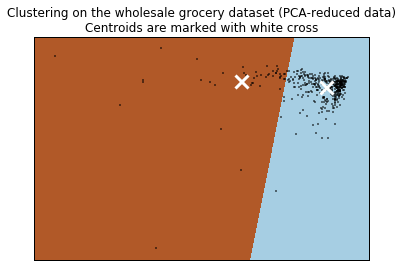

In [10]:
# Put the result into a color plot
def plotClusters(Z,xx,yy,centroids,x_min,x_max,y_min,y_max):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    
plotClusters(Z, xx, yy, centroids, x_min, x_max, y_min, y_max)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)
[1 1 1 1]
isNot
centroids
[[ -3.52778282   0.92939702]
 [  0.42941908  -0.02740804]
 [ -4.51308525 -10.04070335]]

revert of centroids
[[  7713.01273489  19403.20617054  28637.63555828   1192.70353395
   13228.81491345   2676.10203312]
 [ 11950.45309539   4087.4046542    5552.10549994   3046.58317533
    1726.1649055    1262.98482641]
 [ 81410.12439235  30088.63313126  18842.85798626  33954.61886688
    2468.7786494   18947.15792161]]

revert of unit vecotrs
[[ 12542.04853846   9814.8703078   13449.78573957   3320.15314427
    5494.35554418   2225.38258907]
 [ 18669.6371861    6409.37664264   6564.55602068   6036.11091952
    1665.96228909   2945.17100374]]


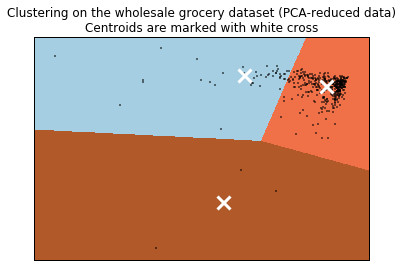

In [11]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
def allSteps(isGMM, reduced_data, clusters):
    (Z,xx,yy,x_min,x_max,y_min,y_max) = xyzzy(reduced_data, clusters)
    centroids = 0
    if (isGMM):
        centroids = clusters.means_
        print "is"
    else:
        centroids = clusters.cluster_centers_
        print "isNot"
    printCentroidInfo(centroids)
    plotClusters(Z, xx, yy, centroids, x_min, x_max, y_min, y_max)

K3clusters = KMeans(n_clusters=3,random_state=0).fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print K3clusters
print K3clusters.predict(reduced_data)[:4]

allSteps(False, reduced_data, K3clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)
[0 3 3 0]
isNot
centroids
[[  0.68468443  -0.15620376]
 [ -7.05027932   0.63634999]
 [ -4.51308525 -10.04070335]
 [ -1.30128824   0.73156912]]

revert of centroids
[[ 12671.14525369   3140.56024245   3969.92306418   3364.99444933
     902.63651133   1267.09698252]
 [ 11575.75815148  33738.3964026   47599.73788995   2935.70615055
   22076.40574756   5559.86842825]
 [ 81410.12439235  30088.63313126  18842.85798626  33954.61886688
    2468.7786494   18947.15792161]
 [  7826.18890799  10577.09565724  16120.904093     1226.43742289
    7170.82509551   1397.3906357 ]]

revert of unit vecotrs
[[ 12542.04853846   9814.8703078   13449.78573957   3320.15314427
    5494.35554418   2225.38258907]
 [ 18669.6371861    6409.37664264   6564.55602068   6036.11091952
    1665.96228909   2945.17100374]]


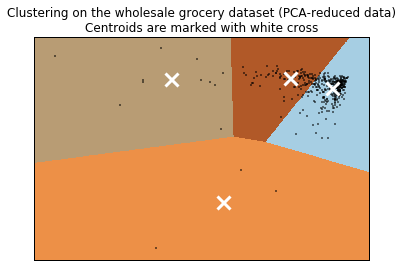

In [18]:
K4clusters = KMeans(n_clusters=4,random_state=0).fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print K4clusters
print K4clusters.predict(reduced_data)[:4]

allSteps(False, reduced_data, K4clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)
[2 0 3 2]
isNot
centroids
[[ -1.34002769   0.81001023]
 [ -7.05027932   0.63634999]
 [  0.75198268   0.20048468]
 [  0.25039316  -1.6392017 ]
 [ -4.51308525 -10.04070335]]

revert of centroids
[[  7324.02560109  10684.6811194   16442.689291     1003.53986154
    7367.39356663   1313.11813349]
 [ 11575.75815148  33738.3964026   47599.73788995   2935.70615055
   22076.40574756   5559.86842825]
 [ 10255.81013714   2651.42569135   4094.51049407   2291.00119221
    1160.36125429    713.34896549]
 [ 22797.03960059   5795.04700559   4301.37252278   7868.66631445
     234.75001031   3677.62607985]
 [ 81410.12439235  30088.63313126  18842.85798626  33954.61886688
    2468.7786494   18947.15792161]]

revert of unit vecotrs
[[ 12542.04853846   9814.8703078   13449.78573957   3320.15314427
    5494.35554418   2225.38258907]
 [ 18669.6371

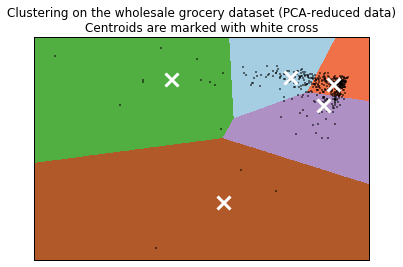

In [14]:
K5clusters = KMeans(n_clusters=5,random_state=0).fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print K5clusters
print K5clusters.predict(reduced_data)[:4]

allSteps(False, reduced_data, K5clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)
[0 0 0 4]
isNot
centroids
[[ -0.71567162   0.5481188 ]
 [  0.33957354  -1.68416831]
 [ -9.31832266   1.12533697]
 [ -4.51308525 -10.04070335]
 [  0.8596866    0.18717984]
 [ -3.21582167   0.89744346]]

revert of centroids
[[  8.73242308e+03   8.33620953e+03   1.26464917e+04   1.62485449e+03
    5.41769997e+03   1.24771368e+03]
 [  2.30486237e+04   5.46423584e+03   3.74865727e+03   7.97981894e+03
   -5.29243644e+01   3.67902024e+03]
 [  9.54325231e+03   4.25529622e+04   6.07486820e+04   2.04923789e+03
    2.85968696e+04   6.45415183e+03]
 [  8.14101244e+04   3.00886331e+04   1.88428580e+04   3.39546189e+04
    2.46877865e+03   1.89471579e+04]
 [  1.02861959e+04   2.22676360e+03   3.48384950e+03   2.30370470e+03
    8.62773304e+02   6.56797933e+02]
 [  7.75711666e+03   1.81691488e+04   2.68780039e+04   1.20998419e+03
    1.2374

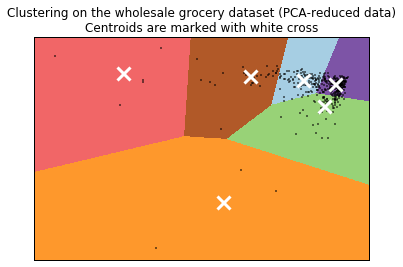

In [15]:
K6clusters = KMeans(n_clusters=6,random_state=0).fit(reduced_data)
#For GMM clusters = GMM(n_components=6,covariance_type='full').fit(reduced_data)
print K6clusters
print K6clusters.predict(reduced_data)[:4]

allSteps(False, reduced_data, K6clusters)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[0 0 0 1]
is
centroids
[[-1.01895835  0.61635831]
 [ 0.85857587 -0.12587327]
 [-0.9217878  -3.07397157]]

revert of centroids
[[  8441.61645307   9513.1605326   14408.74556777   1497.86259442
    6293.09367548   1363.24910097]
 [ 12374.65514142   2423.16340362   3055.83944951   3231.92590322
     485.14975872   1102.20551944]
 [ 33001.03690376  11385.2513658    8756.99356946  12412.54149459
    1553.49041316   6536.55750094]]

revert of unit vecotrs
[[ 12542.04853846   9814.8703078   13449.78573957   3320.15314427
    5494.35554418   2225.38258907]
 [ 18669.6371861    6409.37664264   6564.55602068   6036.11091952
    1665.96228909   2945.17100374]]


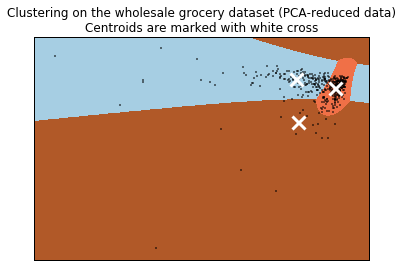

In [16]:
G3clusters = GMM(n_components=3,covariance_type='full').fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print G3clusters
print G3clusters.predict(reduced_data)[:4]

allSteps(True, reduced_data, G3clusters)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[0 0 2 1]
is
centroids
[[-0.31849223  0.67709895]
 [ 0.98268429  0.0608808 ]
 [ 0.17601738 -0.96216904]
 [-6.04691194 -0.08490955]
 [-3.41853265 -8.41740202]
 [-2.25066319  0.72386282]]

revert of centroids
[[  7657.03837929   6661.02356307  10641.45702511   1143.94581268
    4536.70424795    786.29411214]
 [ 11061.89302087   1809.91981868   2632.40406267   2647.54703735
     387.8768675     750.01915542]
 [ 18321.9721446    5678.83787853   5649.18398186   5880.28192493
    1252.03780908   2768.13736922]
 [ 15842.50781762  30148.47179645  41082.52790001   4824.59144536
   18578.031617     5881.40273278]
 [ 69990.80199021  24694.79578351  15075.51773092  28871.17167841
    1582.03628914  15874.83476918]
 [  8391.909454    14396.98283843  21330.36383767   1484.93537029
    9642.04394357   2073.38456608]]

revert of u

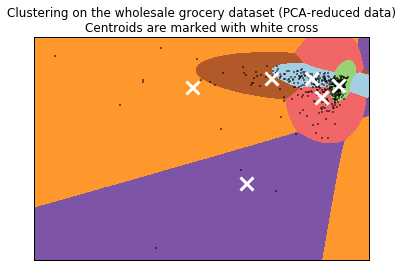

In [17]:
G6clusters = GMM(n_components=6,covariance_type='full').fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print G6clusters
print G6clusters.predict(reduced_data)[:4]

allSteps(True, reduced_data, G6clusters)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Of the several different runs that were done, I'll focus the answer in this section on K=6 and the K-means clustering.

The choice of K is admittedly partially subjective.  Influenced by the ICA, it was easy to imagine 6 different types of stores.  A higher K might be possible.  But already some of the classes are defined by a small number of stores. The purpose of creating classes loses it value if classes get too small.

```
centroids
[[ -0.71567162   0.5481188 ]  -- blue
 [  0.33957354  -1.68416831]  -- green
 [ -9.31832266   1.12533697]  -- rose
 [ -4.51308525 -10.04070335]  -- orange
 [  0.8596866    0.18717984]  -- purple
 [ -3.21582167   0.89744346]] -- brown

revert of centroids
    Fresh    Milk Grocery  Frozen  D&P     Deli
[[   8732    8336   12646    1624  5417    1247]  -- blue
 [  23048    5464    3748    7979     0    3679]  -- green
 [   9543   42552   60748    2049 28596    6454]  -- rose
 [  81410   30088   18842   33954  2468   18947]  -- orange
 [  10286    2226    3483    2303   862     656]  -- purple
 [   7757   18169   26878    1209 12374    2502]] -- brown
```

(food and fresh produce stores, little detergent and paper)
purple -- Fresh food vendor sells sundry other products
green  -- Large Produce & Food store 

(large portion detergent and paper)
blue   -- Corner convience store
brown  -- Small drug store chain mainly packaged commidity goods
rose   -- Large drug store chain mainly packaged commidity goods

(Large everything store)
orange -- SuperStore



###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer:  

I felt the ICA had a much stronger intuitional appeal to me.  I was able to use the component vectors it created to come up reasonably descriptions of 6 different types of stores.  Certainly there could be even more types of stores, but with 6 features, the ICA could produce at most 6, being the min of the number of features and the number of row.

Because there was a fair about of variablity in each of the features the PCA was going to come up with a first basis vector with components with a bit of each feature.  The vector didn't (and wasn't suppose to) a type of store, just a way of spreading all the stores apart from one another.  For purposes of the assignment, and ability to graph the results, it seemed that 2 pricipal components were chosen, despite only explaining 72% of the varability.  It was sort of surprising when the reverting the the first reduced point back to dollar value and comparing to the first row of data that it modeled.
```
   10070  6386     9437    2216              3757          1227  reduce point mapped back
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
   12669  9656     7561     214              2674          1338  starting point of mapping
```

Between the K-mean and the GMM, I felt the resulting partitions felt less blob like.  The GMM produced some elongated structures the bisected other partitions in two.  If I had recognizable names to go along with some stores I might have been able to use domain knowelege to make more sense of the GMM blobs, but without that extra knowlege, the shapes were harder to conceptualize.  The data didn't scream out with some obvious boundaries so was content to have an arbitrary cut make to seperate groups.

**9)** How would you use that technique to help the company design new experiments?

Answer:  

Having mapped each store to a partition, I could used that partition to label each store.  Now instead of testing out a change on n% (or whatever the budget was allowing) of a randomly chosen subset of the the full population.  I would instead randomly chose n% of each labeled group to test out the change from AM to PM delivery.  The remaining portion of each group would be a control with no change.  There are some limitations to this.  The partitions didn't divide each group up to be the same size.  The partition of the large buyers has very few stores in it and can necessarily be divide in a way that one store is n% of the partition.  But from the change we know these high volume customers had an easy time adjusting to the change anyways.

In a sense, they have already run the experiment, there isn't a real need for more disruption.  They implemented the change, and they lost customers.  Using past customer data they can identify which partitions those customers came from.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

Now that custormers have a label.  Hopefully they gathered data on each customer, such as store square footage, zip code, data like all the Boston Housing Price data.   They can use this data and the label to used supervised learning techniques to build a classifier that will be able to predict which class of store a future customer will be before it has even placed any orders.
